# *TITANIC CHALLENGE LETS GO*

## Importing Data

In [84]:
# Importing libraries and Dataset
import pandas as pd
import numpy as np

train_dat = pd.read_csv('./train.csv')
train_dat.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [85]:
# Check for Missing Data
pd.DataFrame([(train_dat[x].isnull().sum()*100/len(train_dat[x]),  x) for x in train_dat]).rename(columns={0:'% Missing', 1:'Feature'})

,% Missing,Feature
0,0.000000,PassengerId
1,0.000000,Survived
2,0.000000,Pclass
3,0.000000,Name
4,0.000000,Sex
5,19.865320,Age
6,0.000000,SibSp
7,0.000000,Parch
8,0.000000,Ticket
9,0.000000,Fare


## Exploratory Data Analysis

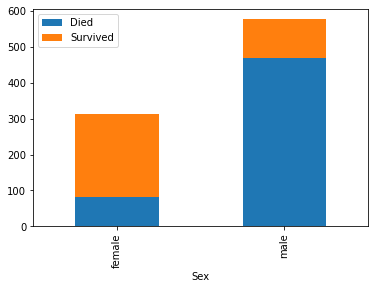

In [86]:
import matplotlib.pyplot as plt

status = pd.get_dummies(train_dat, columns=['Survived'])[['Sex', 'Survived_0', 'Survived_1']].rename(columns = {'Survived_0':'Died', 'Survived_1'
                                                                                                : 'Survived'})
status.groupby('Sex').agg('sum').plot(kind = 'bar', stacked = True).legend(["Died", "Survived"]);

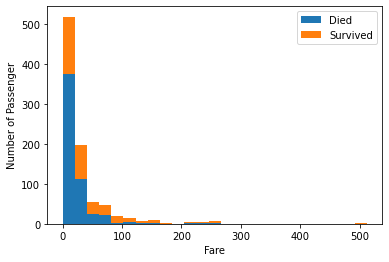

In [87]:
plt.hist([train_dat.loc[train_dat['Survived'] == 0, 'Fare'], train_dat.loc[train_dat['Survived'] == 1, 'Fare']], 
        stacked = True, label=['Died', 'Survived'], bins = 25);
plt.legend()
plt.xlabel('Fare')
plt.ylabel('Number of Passenger');

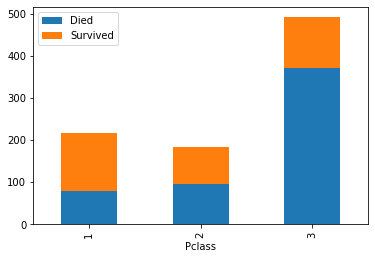

In [88]:
status2 = pd.get_dummies(train_dat, columns=['Survived'])[['Pclass', 'Survived_0', 'Survived_1']].rename(columns = {'Survived_0':'Died', 'Survived_1'
                                                                                          : 'Survived'})
status2.groupby('Pclass').agg('sum').plot(kind = 'bar', stacked = True).legend(["Died", "Survived"]);

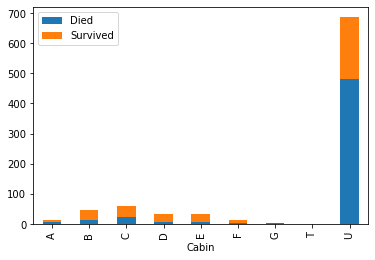

In [89]:
train_dat['Cabin'].fillna('U', inplace=True)
train_dat['Cabin'] = [x[0] for x in train_dat['Cabin']]

status3 = pd.get_dummies(train_dat, columns=['Survived'])[['Cabin', 'Survived_0', 'Survived_1']].rename(columns = {'Survived_0':'Died', 'Survived_1'
                                                                                          : 'Survived'})
status3.groupby('Cabin').agg('sum').plot(kind = 'bar', stacked = True).legend(["Died", "Survived"]);

## Feature Engineering

In [91]:
def produce_data(dat):    
    from sklearn.preprocessing import LabelBinarizer
    from sklearn.preprocessing import minmax_scale

    # Scaling Age and Fare data using Min and Max scale
    dat[['Age','Fare']] = minmax_scale(dat[['Age','Fare']])
    
    dat['Cabin'].fillna('U', inplace=True)
    
    dat['Cabin'] = [x[0] for x in dat['Cabin']]

    # imputing NA and dropping unused column
    dat.fillna(dat.mean(), inplace = True)
    dat.drop(['Name','Ticket'], axis = 1, inplace = True)
    dat.dropna(axis = 0, inplace = True)
    dat = pd.get_dummies(dat, columns=['Sex', 'Embarked', 'Pclass', 'Cabin'])

    dat.set_index('PassengerId', inplace = True)
    return dat

In [92]:
train_dat = pd.read_csv('./train.csv')
train_dat = produce_data(train_dat)
train_dat

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,0.271174,1,0,0.014151,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,1,0.472229,1,0,0.139136,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0.321438,0,0,0.015469,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,1,0.434531,1,0,0.103644,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
5,0,0.434531,0,0,0.015713,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,0.334004,0,0,0.025374,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
888,1,0.233476,0,0,0.058556,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
889,0,0.367921,1,2,0.045771,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [93]:
# splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_dat.drop('Survived', axis = 1), train_dat['Survived'])
X_train.head(6)

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,...,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
PassengerId,,,,,,,,,,,,,,,,,,,,,
458,0.367921,1,0,0.101229,1,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
145,0.220910,0,0,0.022447,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
139,0.195778,0,0,0.017990,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
27,0.367921,0,0,0.014102,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
321,0.271174,0,0,0.014151,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
258,0.371701,0,0,0.168837,1,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0


# Model Selection and Evaluation

In [94]:
# XGBOOST
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV


In [95]:
clf_xgb = XGBClassifier(random_state=0).fit(X_train, y_train)
roc_auc_score(y_test, clf_xgb.predict(X_test))

0.8027805949966195

In [96]:
clf_lr = LogisticRegression(C = 10, random_state=0).fit(X_train, y_train)
roc_auc_score(y_test, clf_lr.predict(X_test))

0.7933569979716025

In [22]:
clf_rf = RandomForestClassifier(random_state= 0).fit(X_train, y_train)
roc_auc_score(y_test, clf_rf.predict(X_test))

0.7916457811194654

# Making Predictions

In [116]:
ans_data = pd.read_csv('./test.csv')
ans_data_final = produce_data(ans_data)

dif_feat = set(train_dat.drop('Survived', axis = 1)) - set(ans_data_final)

if(len(dif_feat) > 0 ):
    for i in dif_feat:
        ans_data_final[i] = 0
        ans_data_final = ans_data_final[train_dat.drop('Survived', axis = 1).columns]

ans_data_final

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,...,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,0.452723,0,0,0.015282,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
893,0.617566,1,0,0.013663,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
894,0.815377,0,0,0.018909,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
895,0.353818,0,0,0.016908,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
896,0.287881,1,1,0.023984,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0.396975,0,0,0.015713,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1306,0.512066,0,0,0.212559,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1307,0.505473,0,0,0.014151,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


## Exporting Answer to csv file

In [133]:
pd.DataFrame(clf_xgb.predict(ans_data_final), index = ans_data_final.index).rename(columns = {0:'Survived'}).to_csv('answer.csv', sep=',', encoding='utf-8')

In [134]:
pd.read_csv('./answer.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
